In [19]:
import pandas as pd 
from pathlib import Path

file = Path.cwd() / 'amostra_servidor.csv'
file

df = pd.read_csv('datasets-master\datasets-master\wall-robot-navigation.csv',sep = ";")


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\felip\AppData\Local\Temp\ipykernel_14760\2214964506.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('datasets-master\datasets-master\wall-robot-navigation.csv',sep = ";")


In [20]:
df

,X1,X2,Y
0,1.687,0.445,4
1,1.687,0.449,4
2,1.687,0.449,4
3,1.687,0.449,4
4,1.687,0.449,4
...,...,...,...
5451,1.024,0.657,1
5452,0.894,0.649,2
5453,0.873,0.642,2
5454,0.967,0.635,1


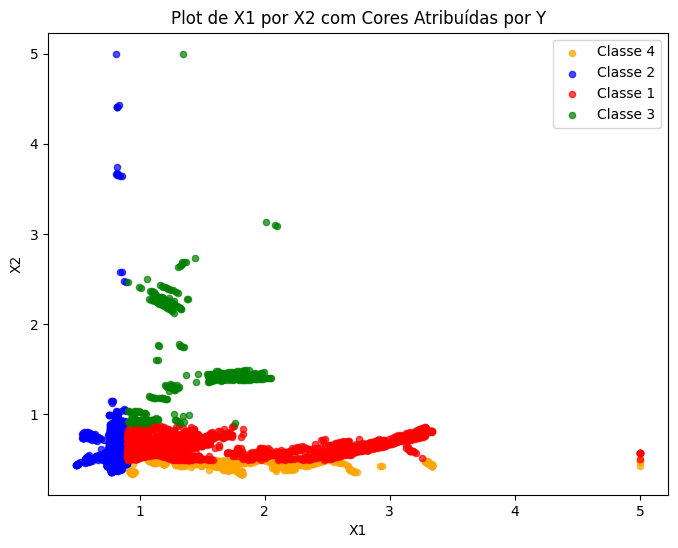

In [26]:
cores = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}

# Plotar os dados
plt.figure(figsize=(8, 6))
for classe in df['Y'].unique():
    plt.scatter(df[df['Y'] == classe]['X1'], df[df['Y'] == classe]['X2'], label=f'Classe {classe}', color=cores[classe], alpha=0.7,s = 20)

# Adicionar legenda
plt.legend()

# Adicionar rótulos dos eixos
plt.xlabel('X1')
plt.ylabel('X2')

# Exibir o gráfico
plt.title('Plot de X1 por X2 com Cores Atribuídas por Y')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(df[["X1","X2"]], df["Y"].values, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to pytorch tensor
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test) 



In [ ]:
def knn(sample, X, y, k_neighbors=10):
    """K-Nearest Neigbhors model
    
    Args:
        X: A torch tensor for the data.
        y: A torch tensor for the labels.
        k_neighbors: An integer for the number of nearest neighbors
            to consider.
    """
    sample = sample.unsqueeze(1).T
    print(sample)
    #calc distancia
    dist = (X - sample).pow(2).sum(axis=1).sqrt() #erro medio quadratico
    
    # ordenamos o vetor pelas distancias:
    temp, indices = torch.sort(dist)
    y = y[indices]
    
    # coletamos os k's elementos mais proximos e retornamos a classe de maior probabilidade
    return y[:k_neighbors].bincount().argmax().item()

def train_knn(X_train, X_test, y_train, y_test, k_neighbors=1):
    """Trains a K-Nearest Neigbhors model 
    
    Args:
        X_train: A torch tensor for the training data.
        X_test: A torch tensor for the test data.
        y_train: A torch tensor for the training labels.
        y_test: A torch tensor for the test labels.
        k_neighbors: An integer for the number of nearest neighbors
            to consider.
    """
    # Allocate space for the prediction
    y_pred_test = np.zeros(y_test.shape, dtype=np.uint8)
    y_pred_train = np.zeros(y_train.shape, dtype=np.uint8)
    X_train_c = X_train.clone()
    
    # Predict on each sample of the train and test
    for i in range(X_test.shape[0]):
        y_pred_test[i] = knn(X_test[i], X_train, y_train, k_neighbors=k_neighbors)
    y_pred_test = torch.from_numpy(y_pred_test).float()
    return y_pred_test


pred_test = train_knn(X_train, X_test, y_train, y_test, k_neighbors=2)
print(classification_report(y_test, pred_test))

# Save data for future visualization
X_train_viz = X_train
X_test_viz = X_test
y_train_viz = y_train
y_test_viz = y_test

In [87]:
X = X_test
y_pred = pred_test

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                        np.linspace(y_min, y_max, 101))

X_to_pred_on = torch.from_numpy(
        np.column_stack((xx.ravel(), yy.ravel()))).float()
previsao_area = []
for i in range(X_to_pred_on.shape[0]):
        print(X_to_pred_on[i])
        # previsao_area[i] = knn(X_to_pred_on[i], X_train, y_train, k_neighbors=2)

tensor([-1.3833, -1.0975])
tensor([-1.3083, -1.0975])
tensor([-1.2333, -1.0975])
tensor([-1.1583, -1.0975])
tensor([-1.0833, -1.0975])
tensor([-1.0084, -1.0975])
tensor([-0.9334, -1.0975])
tensor([-0.8584, -1.0975])
tensor([-0.7834, -1.0975])
tensor([-0.7084, -1.0975])
tensor([-0.6334, -1.0975])
tensor([-0.5584, -1.0975])
tensor([-0.4834, -1.0975])
tensor([-0.4084, -1.0975])
tensor([-0.3335, -1.0975])
tensor([-0.2585, -1.0975])
tensor([-0.1835, -1.0975])
tensor([-0.1085, -1.0975])
tensor([-0.0335, -1.0975])
tensor([ 0.0415, -1.0975])
tensor([ 0.1165, -1.0975])
tensor([ 0.1915, -1.0975])
tensor([ 0.2665, -1.0975])
tensor([ 0.3414, -1.0975])
tensor([ 0.4164, -1.0975])
tensor([ 0.4914, -1.0975])
tensor([ 0.5664, -1.0975])
tensor([ 0.6414, -1.0975])
tensor([ 0.7164, -1.0975])
tensor([ 0.7914, -1.0975])
tensor([ 0.8664, -1.0975])
tensor([ 0.9413, -1.0975])
tensor([ 1.0163, -1.0975])
tensor([ 1.0913, -1.0975])
tensor([ 1.1663, -1.0975])
tensor([ 1.2413, -1.0975])
tensor([ 1.3163, -1.0975])
t

In [80]:
X_to_pred_on

tensor([[-1.3833, -1.0975],
        [-1.3083, -1.0975],
        [-1.2333, -1.0975],
        ...,
        [ 5.9656, 10.9629],
        [ 6.0406, 10.9629],
        [ 6.1155, 10.9629]])

In [ ]:
# Reshape preds and plot
y_pred = y_pred.reshape(xx.shape).detach().numpy()
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [75]:
y_pred.reshape(101,101)

RuntimeError: shape '[101, 101]' is invalid for input of size 1092

In [ ]:
from clustering import KNN
a = th.Tensor([
    [1, 1],
    [0.88, 0.90],
    [-1, -1],
    [-1, -0.88]
])

b = th.LongTensor([3, 3, 5, 5])

c = th.Tensor([
    [-0.5, -0.5],
    [0.88, 0.88]
])

knn = KNN(a, b)
print(knn(c))